# Capstone Three - Data wrangling and EDA : Sentiment Analysis for Hotel Ratings

This notebook contains Data wrangling and EDA procedures.

Dataset was retrieved from https://www.kaggle.com/datasets/raj713335/tbo-hotels-dataset.

    "The dataset has 16 columns and 10,00,000+ rows, with each row representing a hotel. The columns are:

    countyCode: Country Code to which this hotel belongs.
    countyName: Country Name where this hotel belongs.
    cityCode: The city Code where the hotel is located.
    cityName: The city where the hotel is located.
    HotelCode: A unique identifier for each hotel.
    hotel_name: The name of the hotel.
    HotelRating: The star rating of the hotel, ranging from 1 to 5.
    Address: The address of the hotel.
    Attractions: The Attractions nearby to the hotel.
    Description: The detailed Description of the hotel.
    FaxNumber: The Fax Number of the hotel.
    HotelFacilities: The Hotel Facilities available in the hotel.
    Map: The GPS location of the hotel available in the hotel in latitude and longitude.
    PhoneNumber: The Phone Number of the hotel.
    PinCode: The PIN Code of the hotel address.
    HotelWebsiteUrl: The web booking URL of the hotel."
    

In [64]:
# load the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [10]:
# import the data set
df = pd.read_csv('C:/Users/Angela/casestudy/Capstone_Three/data/hotels.csv', encoding='latin-1')
df.head()

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...


In [23]:
# check column names

df.columns

Index(['countyCode', ' countyName', ' cityCode', ' cityName', ' HotelCode',
       ' HotelName', ' HotelRating', ' Address', ' Attractions',
       ' Description', ' FaxNumber', ' HotelFacilities', ' Map',
       ' PhoneNumber', ' PinCode', ' HotelWebsiteUrl'],
      dtype='object')

In [24]:
# here we got spaces for most columns. To clear the spaces, rename the columns

new_column_names = {' countyName': 'countyName', ' cityCode': 'cityCode', ' cityName': 'cityName',' HotelCode':'HotelCode',
                    ' HotelName':'HotelName', ' HotelRating':'HotelRating',' Address':'Address', ' Attractions':'Attractions',
                    ' Description':'Description',' FaxNumber':'FaxNumber', ' HotelFacilities':'HotelFacilities', ' Map':'Map',
                    ' PhoneNumber':'PhoneNumber', ' PinCode':'PinCode',' HotelWebsiteUrl':'HotelWebsiteUrl'
                   }
df = df.rename(columns=new_column_names)
df.columns

Index(['countyCode', 'countyName', 'cityCode', 'cityName', 'HotelCode',
       'HotelName', 'HotelRating', 'Address', 'Attractions', 'Description',
       'FaxNumber', 'HotelFacilities', 'Map', 'PhoneNumber', 'PinCode',
       'HotelWebsiteUrl'],
      dtype='object')

In [19]:
# check the shape of the dataset

df.shape

(1010033, 16)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   countyCode       1009121 non-null  object
 1   countyName       1010033 non-null  object
 2   cityCode         1010033 non-null  int64 
 3   cityName         1010033 non-null  object
 4   HotelCode        1010033 non-null  int64 
 5   HotelName        1010033 non-null  object
 6   HotelRating      1010033 non-null  object
 7   Address          1009931 non-null  object
 8   Attractions      484941 non-null   object
 9   Description      963028 non-null   object
 10  FaxNumber        449686 non-null   object
 11  HotelFacilities  959655 non-null   object
 12  Map              1009103 non-null  object
 13  PhoneNumber      682896 non-null   object
 14  PinCode          979062 non-null   object
 15  HotelWebsiteUrl  759915 non-null   object
dtypes: int64(2), object(14)
memory usage

In [26]:
# check missing values

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])

,count,%
countyName,0,0.000000
cityCode,0,0.000000
cityName,0,0.000000
HotelCode,0,0.000000
HotelName,0,0.000000
HotelRating,0,0.000000
Address,102,0.010099
countyCode,912,0.090294
Map,930,0.092076
PinCode,30971,3.066335


The columns 'HotelWebsiteUrl', 'PhoneNumber', 'Attractions', and 'FaxNumber' exhibit over 20% missing values and cannot be imputed, hence they should be dropped.

The columns 'countyCode', 'cityCode', and 'HotelCode' are redundant as they contain similar information to 'countyName', 'cityName', and 'HotelName' respectively, therefore they will be removed.

The column 'PinCode' appears unnecessary for our analysis and will also be dropped.

In [27]:
# drop the columns

df = df.drop(['HotelWebsiteUrl', 'PhoneNumber', 'Attractions','FaxNumber', 'PinCode', 'countyCode', 
                      'cityCode','HotelCode'], axis = 1)
df.head()

,countyName,cityName,HotelName,HotelRating,Address,Description,HotelFacilities,Map
0,Albania,Albanien,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.32213|19.81665
1,Albania,Albanien,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.30413|19.74703
2,Albania,Albanien,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.3216|19.81199
3,Albania,Albanien,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",This hotel enjoys an enviable setting in Tiran...,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052
4,Albania,Albanien,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.29125|19.85349


In [28]:
# check the missing value again

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count', '%'])

,count,%
countyName,0,0.000000
cityName,0,0.000000
HotelName,0,0.000000
HotelRating,0,0.000000
Address,102,0.010099
Map,930,0.092076
Description,47005,4.653808
HotelFacilities,50378,4.987758


As we intend to apply NLP to the 'Description' and 'HotelFacilities' columns, and given that missing values in these columns cannot be imputed, we will drop the null entries.

In [29]:
df = raw_df.dropna()

In [30]:
df.shape

(956513, 8)

It is acceptable that we still got about 1 billion data remaining.

In [31]:
# replace the rating with numbers

rating_map = {'FiveStar':5, 'FourStar':4, 'ThreeStar':3, 'TwoStar':2, 'OneStar':1}

df['HotelRating'] = df['HotelRating'].map(rating_map)
df.head()

,countyName,cityName,HotelName,HotelRating,Address,Description,HotelFacilities,Map
0,Albania,Albanien,De Paris Hotel,4.0,Nr. 7 Brigada Viii Street Tirane,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.32213|19.81665
1,Albania,Albanien,Hotel Green,4.0,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.30413|19.74703
2,Albania,Albanien,Theranda Hotel,3.0,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.3216|19.81199
3,Albania,Albanien,Seven Hotel,3.0,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",This hotel enjoys an enviable setting in Tiran...,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052
4,Albania,Albanien,Viktoria,3.0,Rruga E Elbasanit Km 4 Sauk SaukTirana,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.29125|19.85349


C:\Users\Angela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


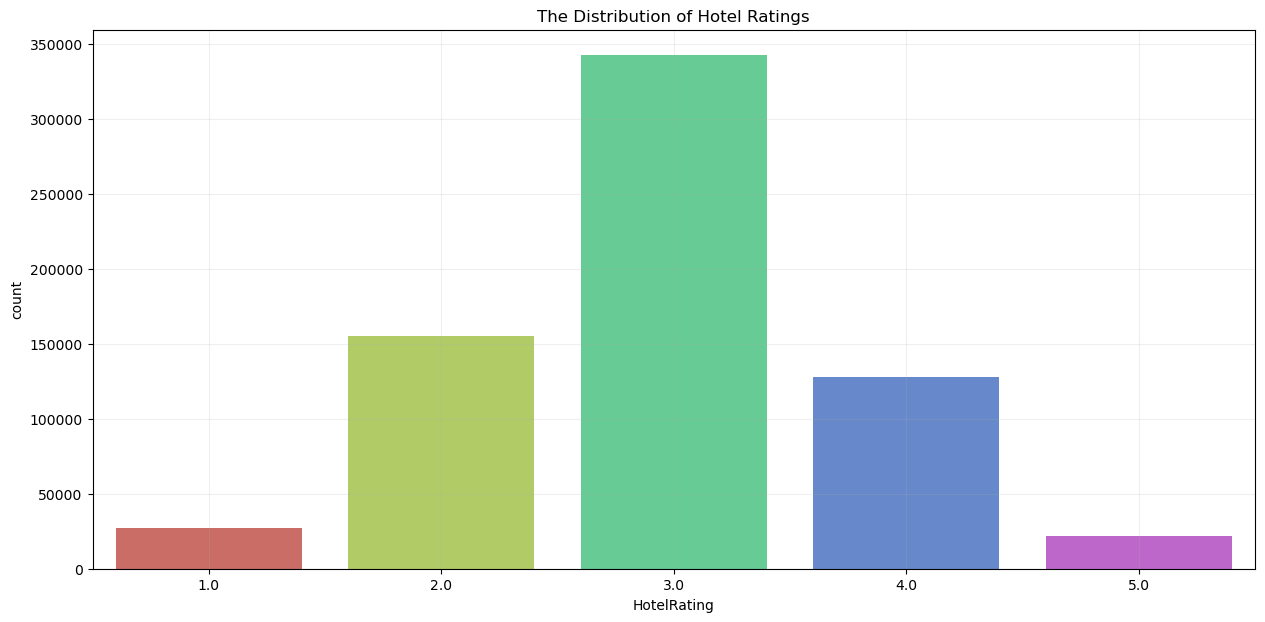

In [38]:
# plot the ratings

plt.figure(figsize=(15, 7))
ax = sns.countplot(df['HotelRating'], palette='hls')
plt.title('The Distribution of Hotel Ratings')
plt.grid(alpha=0.2)

(136,)

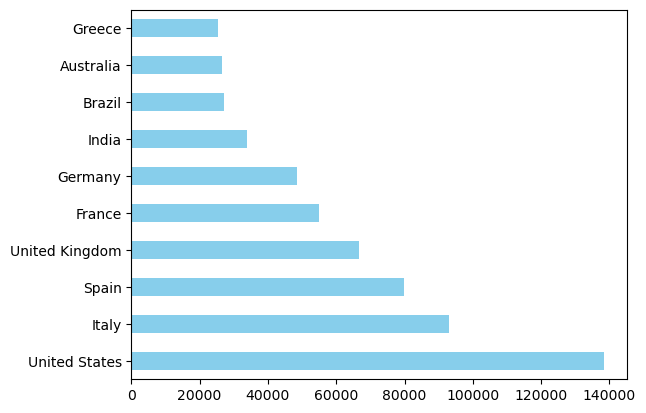

In [129]:
# plot the top 10 countries, based on the number of hotels

country = df['countyName'].value_counts()
country[:10].plot(kind='barh', color = 'skyblue')
country.shape

In this dataset, it can be observed that the United States has the highest number of hotels in total, followed by several Europe countries including Italy, Spain, the United Kingdom, France, and Germany.

To visualize the distribution of hotels on map, we need to separate 'map' column which contains the geometric coordinates, and then create two columns for plotting latitude and longitude.

In [85]:
# separate the 'map' column and create new columns for plotting the latitude and longitude.

df[['latitude', 'longitude']] = df['Map'].str.split('|', expand=True).astype(float)
df = df.drop(['Map'], axis = 1)

In [86]:
df.head()

,countyName,cityName,HotelName,HotelRating,Address,Description,HotelFacilities,latitude,longitude
0,Albania,Albanien,De Paris Hotel,4.0,Nr. 7 Brigada Viii Street Tirane,Hotel de Paris is a charming boutique hotel th...,Private parking Parking onsite Television in c...,41.322130,19.816650
1,Albania,Albanien,Hotel Green,4.0,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,"Located in a suburb of Tirana, Hotel Green is ...",airport pick up wifi available in all areas Ai...,41.304130,19.747030
2,Albania,Albanien,Theranda Hotel,3.0,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",face masks for guests available all plates cu...,41.321600,19.811990
3,Albania,Albanien,Seven Hotel,3.0,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",This hotel enjoys an enviable setting in Tiran...,À la carte dinner Breakfast buffet Breakfast C...,41.328027,19.815052
4,Albania,Albanien,Viktoria,3.0,Rruga E Elbasanit Km 4 Sauk SaukTirana,Located in a new residential area at the edge ...,internet services Ironing service Family rooms...,41.291250,19.853490


In [103]:
df.describe()

,HotelRating,latitude,longitude
count,673701.000000,956513.000000,956513.000000
mean,2.945029,30.064417,6.006942
std,0.839886,24.366290,68.886942
min,1.000000,-87.227465,-179.996970
25%,2.000000,21.796344,-34.978562
50%,3.000000,38.781400,7.056320
75%,3.000000,45.985600,27.077530
max,5.000000,127.926915,1144.670800


The range of latitude and longitude should be (-90, 90) and (-180, 180), respectively.

Here I got some abnormal values: for example, the maximum of longtitude is 1144.67 and the maximum of latitude is 127.9.

In [105]:
# drop the rows that contains values exceed (-180, 180) and (-90, 90) for columns 'longitude' and 'latitude' respectively
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
df.shape

(956511, 9)

In [106]:
df.describe()

,HotelRating,latitude,longitude
count,673699.000000,956511.000000,956511.000000
mean,2.945029,30.064301,6.005719
std,0.839888,24.366105,68.877167
min,1.000000,-87.227465,-179.996970
25%,2.000000,21.796267,-34.978726
50%,3.000000,38.781400,7.056220
75%,3.000000,45.985570,27.077394
max,5.000000,78.222119,179.998540


Now we got a normal range of geometric coordinates.

In [108]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

coordinate = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=coordinate)   

C:\Users\Angela\AppData\Local\Temp\ipykernel_20432\3892112041.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



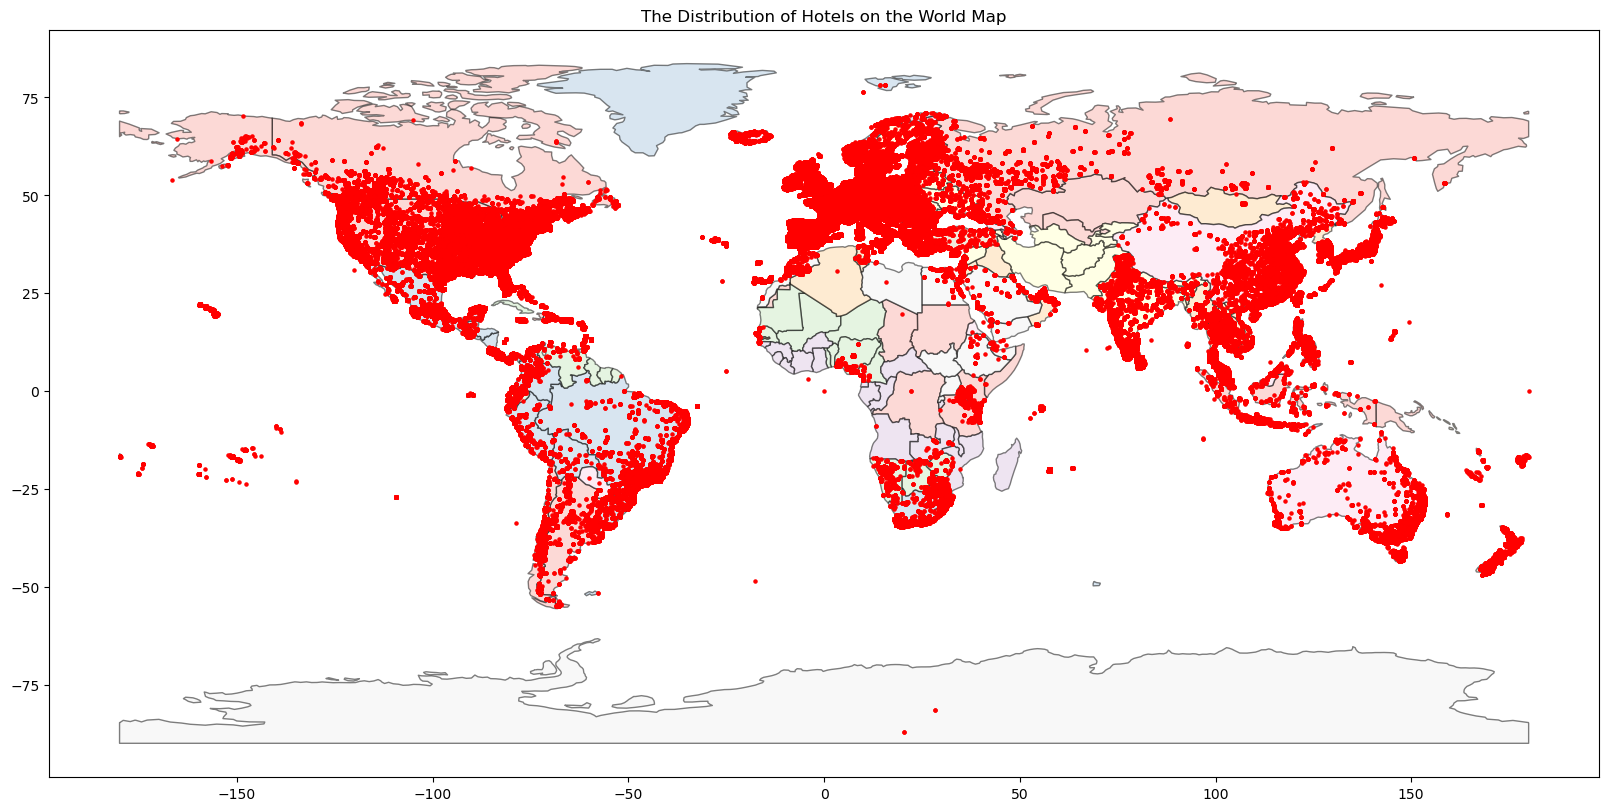

In [114]:
# the full view of hotels on world map

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = fig.add_subplot()

gdf.plot(ax=world.plot(figsize=(20, 10), cmap='Pastel1', edgecolor='black', alpha=0.5), 
         color = 'red', marker='o', markersize=5);

plt.title('The Distribution of Hotels on the World Map')
plt.show()

There are too may dots overlap on the map. We could create subsets for every star rating and plot them on the map.

In [119]:
# create subsets for every star rating

five_star = df[df['HotelRating'] == 5]
four_star = df[df['HotelRating'] == 4]
three_star = df[df['HotelRating'] == 3]
two_star = df[df['HotelRating'] == 2]
one_star = df[df['HotelRating'] == 1]

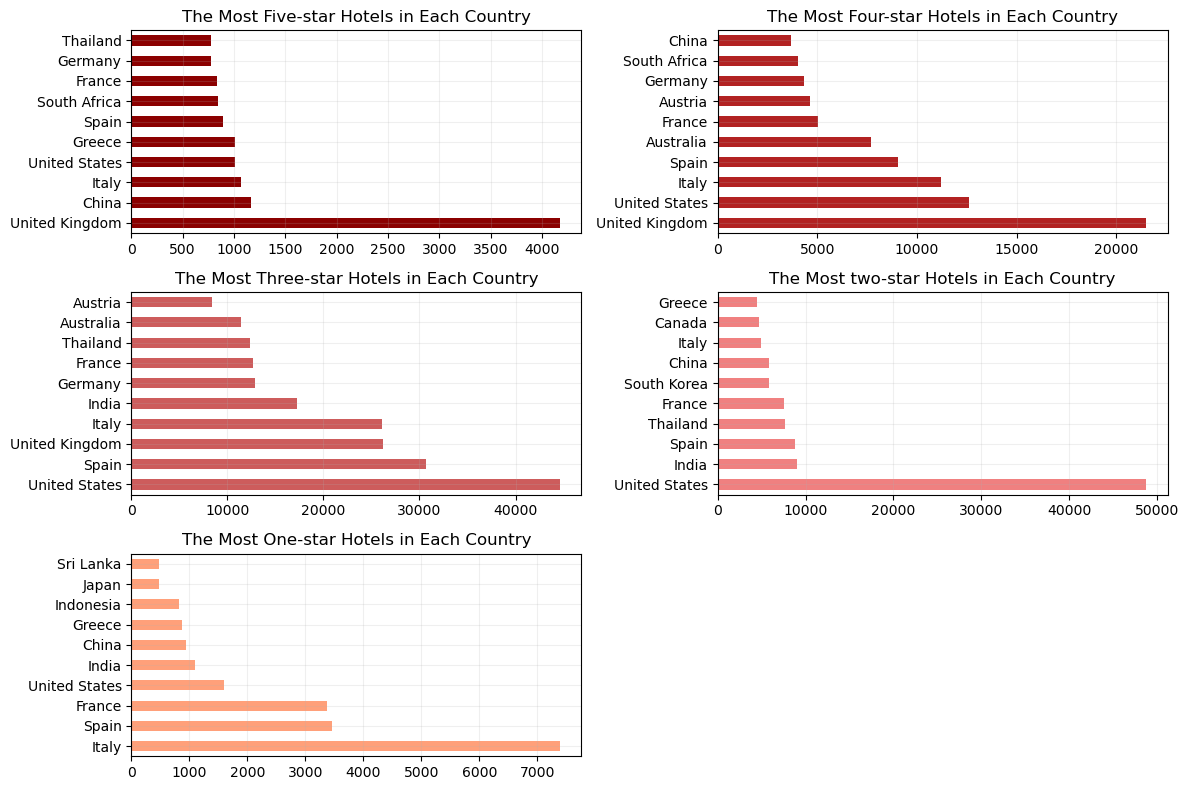

In [156]:
# plot the subset for each country

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

five_star['countyName'].value_counts()[:10].plot(kind='barh', ax=axes[0, 0], color='darkred')
axes[0, 0].set_title('The Most Five-star Hotels in Each Country')
axes[0, 0].grid(alpha=0.2)

four_star['countyName'].value_counts()[:10].plot(kind='barh', color = 'firebrick', ax=axes[0, 1])
axes[0, 1].set_title('The Most Four-star Hotels in Each Country')
axes[0, 1].grid(alpha=0.2)

three_star['countyName'].value_counts()[:10].plot(kind='barh', color = 'indianred', ax=axes[1, 0])
axes[1, 0].set_title('The Most Three-star Hotels in Each Country')
axes[1, 0].grid(alpha=0.2)

two_star['countyName'].value_counts()[:10].plot(kind='barh', color = 'lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('The Most two-star Hotels in Each Country')
axes[1, 1].grid(alpha=0.2)

one_star['countyName'].value_counts()[:10].plot(kind='barh', color = 'lightsalmon', ax=axes[2, 0])
axes[2, 0].set_title('The Most One-star Hotels in Each Country')
axes[2, 0].grid(alpha=0.2)

axes[2, 1].axis('off')


plt.tight_layout()
plt.show()

The United Kingdom boasts the highest number of five-star and four-star hotels overall. Meanwhile, the United States leads in the number of three-star and two-star hotels. Italy, on the other hand, has the highest number of one-star hotels.

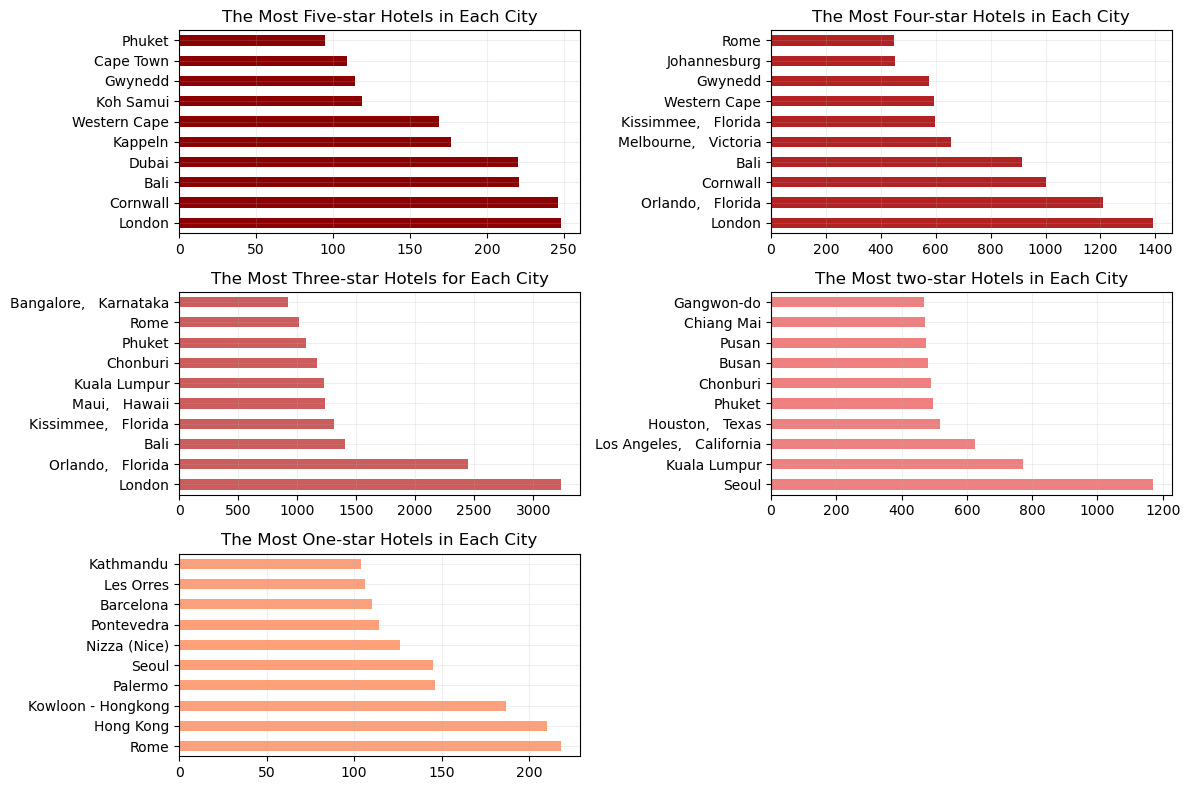

In [155]:
# plot the subset for each city

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

five_star['cityName'].value_counts()[:10].plot(kind='barh', ax=axes[0, 0], color='darkred')
axes[0, 0].set_title('The Most Five-star Hotels in Each City')
axes[0, 0].grid(alpha=0.2)

four_star['cityName'].value_counts()[:10].plot(kind='barh', color = 'firebrick', ax=axes[0, 1])
axes[0, 1].set_title('The Most Four-star Hotels in Each City')
axes[0, 1].grid(alpha=0.2)

three_star['cityName'].value_counts()[:10].plot(kind='barh', color = 'indianred', ax=axes[1, 0])
axes[1, 0].set_title('The Most Three-star Hotels for Each City')
axes[1, 0].grid(alpha=0.2)

two_star['cityName'].value_counts()[:10].plot(kind='barh', color = 'lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('The Most two-star Hotels in Each City')
axes[1, 1].grid(alpha=0.2)

one_star['cityName'].value_counts()[:10].plot(kind='barh', color = 'lightsalmon', ax=axes[2, 0])
axes[2, 0].set_title('The Most One-star Hotels in Each City')
axes[2, 0].grid(alpha=0.2)

axes[2, 1].axis('off')


plt.tight_layout()
plt.show()

London holds the highest number of five-star and four-star hotels overall, while Seoul tops the list for two-star hotels. However, there seems to be some inconsistency with the country plot. Although the United States leads in the number of three-star and two-star hotels over other countries, cities in the United States do not appear in either the three-star or two-star city plot.

In [122]:
# create function for ploting the world map

def map_world(data):
    coordinates = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
    gdf = GeoDataFrame(data, geometry=coordinates) 
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax = fig.add_subplot()
    gdf.plot(ax=world.plot(figsize=(20, 10), cmap='Pastel1', edgecolor='black', alpha=0.5), 
             color = 'red', marker='o', markersize=5);
    plt.show()

C:\Users\Angela\AppData\Local\Temp\ipykernel_20432\3533684483.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



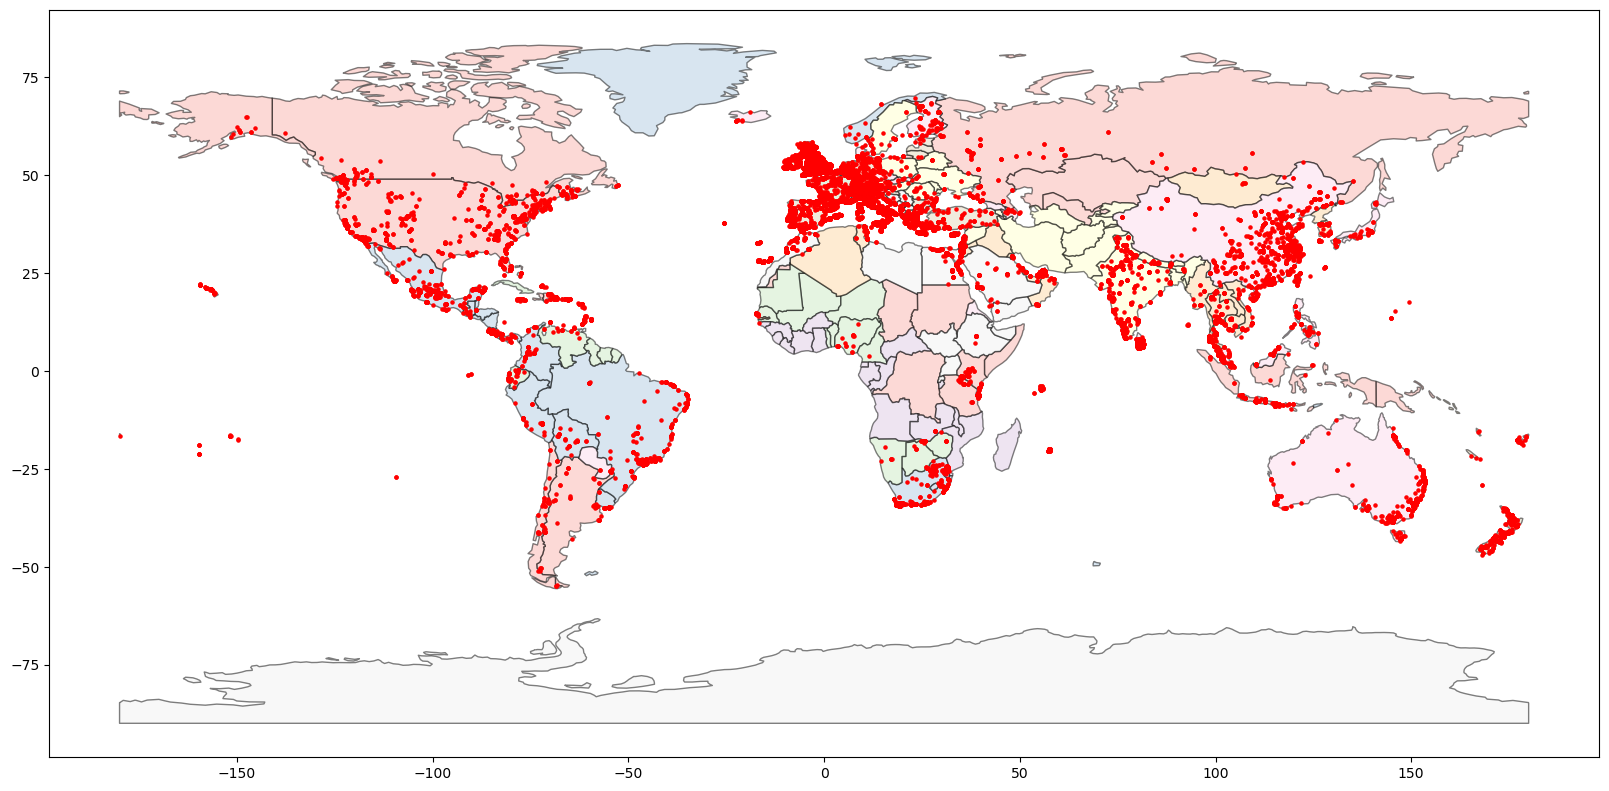

In [123]:
map_world(five_star)

C:\Users\Angela\AppData\Local\Temp\ipykernel_20432\3533684483.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



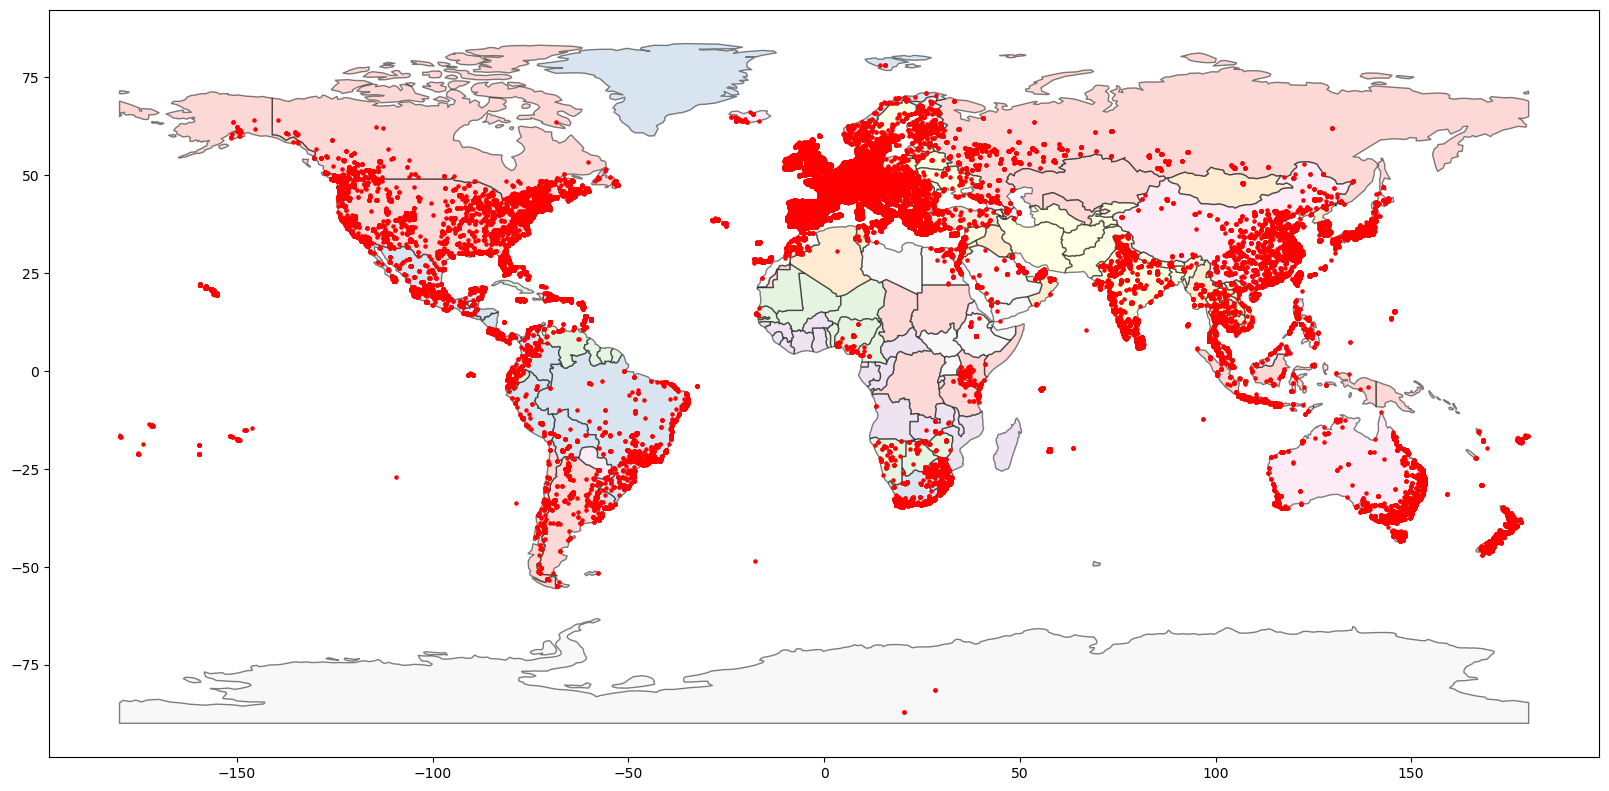

In [124]:
map_world(four_star)

C:\Users\Angela\AppData\Local\Temp\ipykernel_20432\3533684483.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



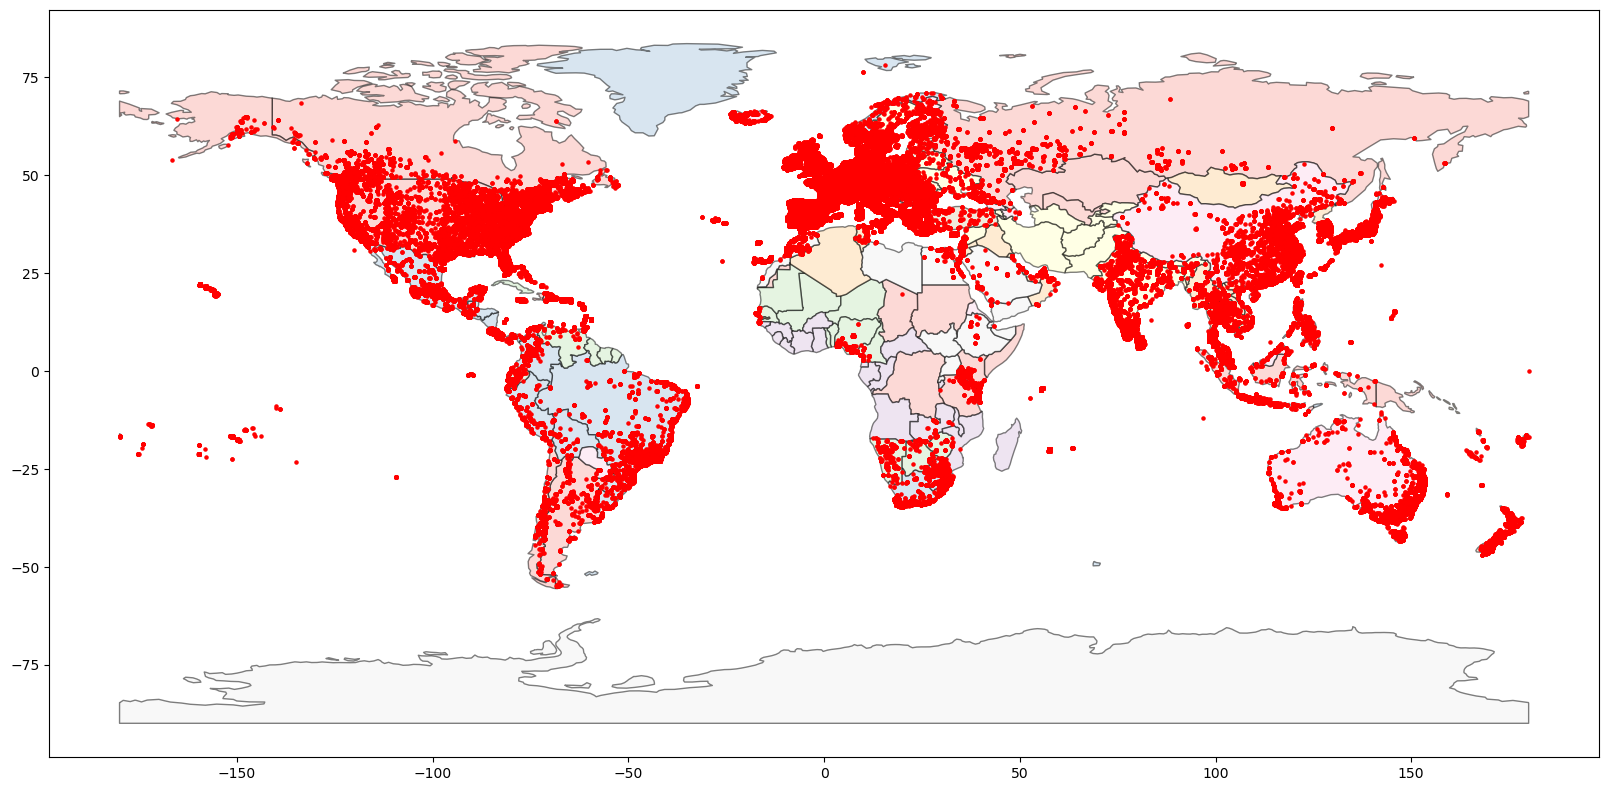

In [125]:
map_world(three_star)

C:\Users\Angela\AppData\Local\Temp\ipykernel_20432\3533684483.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



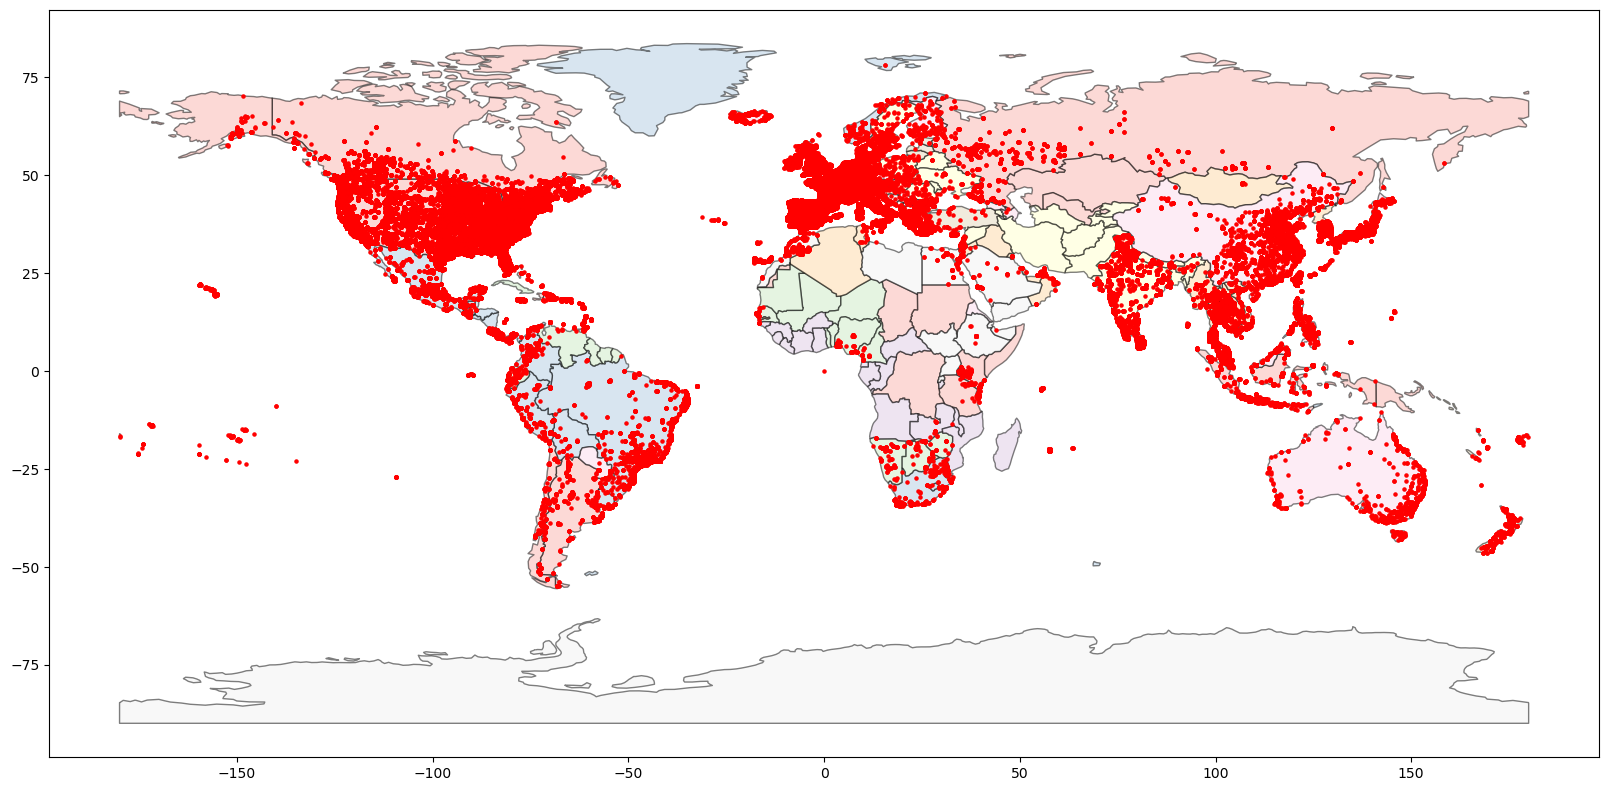

In [126]:
map_world(two_star)

C:\Users\Angela\AppData\Local\Temp\ipykernel_20432\3533684483.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



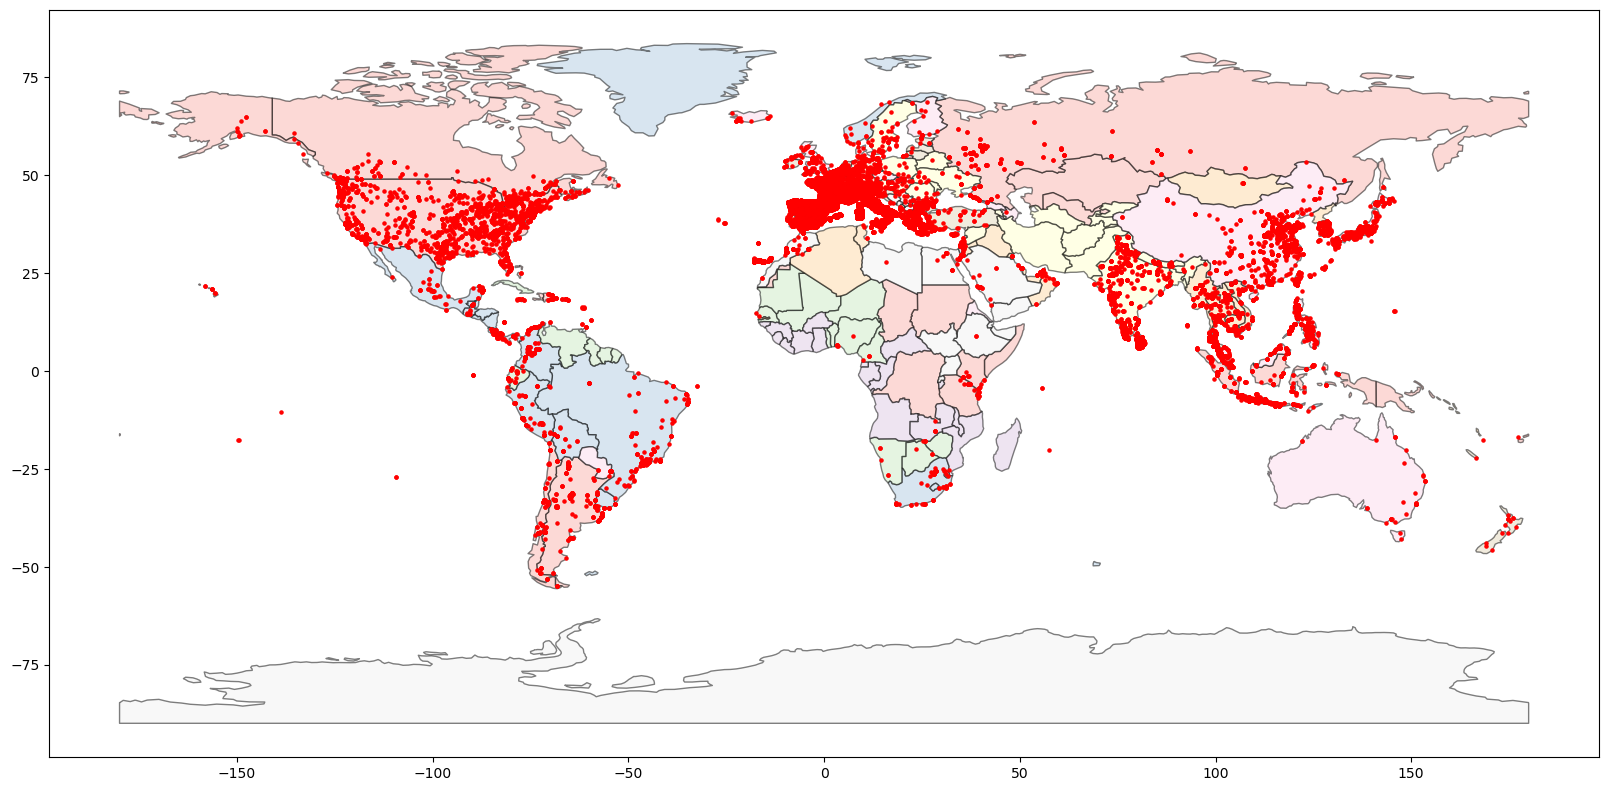

In [127]:
map_world(one_star)

In [128]:
os.makedirs('/Users/Angela/casestudy/Capstone_Three/data', exist_ok=True)  
df.to_csv('/Users/Angela/casestudy/Capstone_Three/data/hotel_cleaned_v2.csv', index=False)  